# Wave divisor function: $\sigma_{0}(x)$

The integer divisor function can be described as a summation of repeating waves. Each wave filters out numbers. Divisor wave filters $\mathbb{X}=7$ wil filter: 7, 14, 21, 28, 35 etc. The divisor function can bescribed as:

$$\large \sigma_{0}(x)=\sum_{\mathbb{X}=2}^{\infty}\cos^{N} \left( \frac{\pi}{\mathbb{X}}x \right)$$

N should be a positive even integer, only then positive pulses occur. If $N\rightarrow\infty$ discrete pulses occur on the intervals determined by: $\mathbb{X}$. This definition of the divisor function does not take 1 in account, for the conventional definition 1 should be added to the wave divisor function.

With help of Euler’s formula and the binomial theorem the function can be rewritten as:

$$\large \sigma_{0}(x)=\sum_{\mathbb{X}=2}^{\infty}e^{i\left( \frac{N\pi}{\mathbb{X}}x \right)} 2^{(-N)} \sum_{k=0}^{N} \binom{N}{k} e^{-i\left( \frac{\pi}{\mathbb{X}}x \right)}  $$

The solution for the divisor function occurs when the angular component is 0 only then pulses of magnitude 1 occur. For the divisor function we can set: $e^{i\left( \frac{N\pi}{\mathbb{X}}x \right)}=1$. So the "Wave Divisor Function" becomes:

$$\large \sigma_{0}(x)=\sum_{\mathbb{X}=2}^{\infty} 2^{(-N)} \sum_{k=0}^{N} \binom{N}{k} e^{-i\left( \frac{\pi}{\mathbb{X}}x \right)}  $$

The n choose k notation can be writen in a trigiometric formulation.

$$\large \Re(\sigma_{0})=\sum_{\mathbb{X}=2}^{\infty}\cos^{N} \left( \frac{\pi}{\mathbb{X}}x \right) \cos \left( \frac{N\pi}{\mathbb{X}}x  \right) $$

$$\large \Im(\sigma_{0})=-i \sum_{\mathbb{X}=2}^{\infty}\cos^{N} \left( \frac{\pi}{\mathbb{X}}x \right) \sin \left( \frac{N\pi}{\mathbb{X}}x  \right) $$

This is only valid with the following criteria:

$$\large \cos^{2} \left( \frac{N\pi}{\mathbb{X}}x  \right) + \sin^{2} \left( \frac{N\pi}{\mathbb{X}}x  \right)=1$$

Thus the solution of the divisor function is only valid for integer values of $x$. The wave divisor function consists of repeating wave packages with different different frequencies. The wave divisor function will have an error. It appears that the error is dependant upon the pulse width. N determines the pulse width of the individual wave packages.


# N the pulse width definition.

The wave divisor function consists of repeating wave packages. The width of a wave package can be described as the pulse height $L$ at $\Delta x$:

$$\large \cos^{N} \left( \frac{\pi}{\mathbb{X}} \Delta x \right)=L$$

So N can be calculated, we can determine $N(\mathbb{X})$ for every divisor wave.

$$\large N(\mathbb{X})= \frac{ln(L)}{ln \left(  \cos \left(  \frac {\pi}{\mathbb{X} } \Delta x  \right)      \right)} $$

For $(\mathbb{X} \rightarrow \infty)$ N can be approximated as:

$$\large N(\mathbb{X}) \approx \lim_{\mathbb{X} \rightarrow \infty}     \frac{ln(L)}{ln \left(  \cos \left(  \frac {\pi}{\mathbb{X} } \Delta x  \right)      \right)} = - \frac{2 \mathbb{X}^2 \log(L)}{\pi^2 \Delta x^2} $$

Wolfram Alpha:
https://www.wolframalpha.com/input/?i=ln%28L%29%2F%28ln%28cos%28pi*delta%2FX%29%29%29+as+X-%3Einfinity


# Error of the Wave Divisor Function.

The error of the wave divisor function is determined. It appears that the error follows a random walk over an arcsine distribution. The boundaries of the arcsine distribution are derived to be (for $\mathbb{X} \rightarrow \infty$ ):

$$\large max(\epsilon)=exp \left( \frac{\log(L)}{\Delta x^2}      \right)$$

The statistical variation of the arcsine distribution is determined as:

$$\large Var(\mathbb{X})=0.5$$

The total expected error is defined as the variation in $\sigma_{0}(x)$:

$$\large Var(\sigma_{0})=max(\epsilon) \cdot Var(\mathbb{X}) \cdot (\sigma_{0}(x-1)+\sigma_{0}(x+1)) $$

More information:
https://drive.google.com/open?id=10p06BBJtKVcreHfzzbF--a47fR_lbW_h

# Simulation of Wave Divisor Function.

Below is a simulation of the wave divisor function. The real solution of the divisor count is displayed for the number $x=1 \space to \space  x=100$. The number of divisor waves can be selected and the pulse width can be set $L, \space \delta x$

In [4]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
 
from operator import add

%matplotlib notebook


<IPython.core.display.Javascript object>


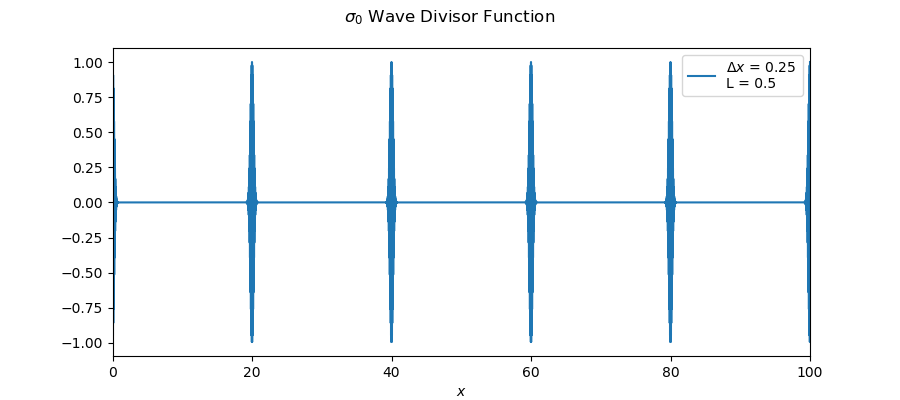

Options:
L is pulse height at dx
Select number of divisors waves (use: <Ctrl> or <Alt> to select multiples.)


interactive(children=(FloatSlider(value=0.25, description='$\\Delta x$:', max=0.99, min=0.15, step=0.01), Floa…

In [5]:
x1 = np.linspace(0, 100, 40001)
fig, ax1 = plt.subplots(1, figsize=(9, 4))
plt.suptitle('$\sigma_{0}$ Wave Divisor Function')

def update_plot(dx, L, wave):
    
    ax1.clear()
    
    y=[0]*40001
    
    for w in wave:
  
        N=-2*(w**2)*np.log(L)/((np.pi**2)*(dx**2))
        N=2*round(0.5*N,0)
        
        yw = ((np.cos(x1*np.pi/w))**N)*(np.cos(np.pi*N*x1/w))
              
        
        y=list(map(add, y, yw) )
    
    units = '$\Delta x$ = {} \nL = {}'
    
    ax1.plot(x1, y, label=units.format(dx, L))
    ax1.set_xlim(x1[0], x1[-1])
    ax1.legend(loc=1)
    ax1.set_xlabel('$x$')
    plt.show()

print("Options:")
print("L is pulse height at dx")
print("Select number of divisors waves (use: <Ctrl> or <Alt> to select multiples.)")
dx = widgets.FloatSlider(min=0.15, max=0.99, value=0.25, step=0.01, description='$\Delta x$:')
L = widgets.FloatSlider(min=0.15, max=0.99, value=0.5, step=0.01, description='L')
wave = widgets.SelectMultiple(options=list(range(2,101)), value=(20, ), description="$\mathbb{X}$")   

widgets.interactive(update_plot, dx=dx, L=L, wave=wave)

# Oribitals of numbers.

Every number can be seen as a path in the $\Re, \space \Im$ plane. Prime numbers will only have one frequency. Numbers with more divisors will have an unique resonation. When the pulse width is small enough like: $\Delta x=0.25, \space L=0.5$ the effect of neigbour pulses is neglactable and the resconance curve can be displayed.

<IPython.core.display.Javascript object>


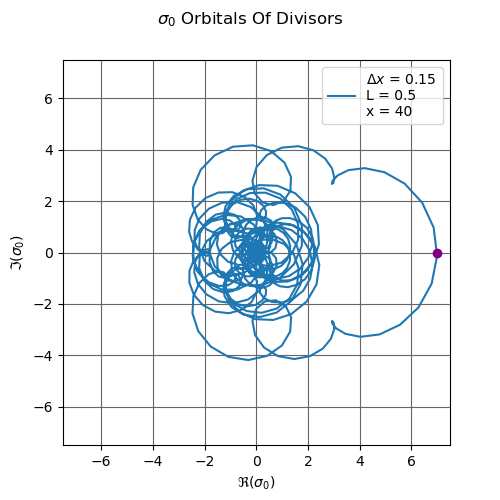

Options:
L is pulse height at dx.
Select x to display orbital.


interactive(children=(Dropdown(description='$\\Delta x$', index=2, options=(0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0…

In [20]:
x = np.linspace(0, 51, 80002)
fig, ax2 = plt.subplots(1, figsize=(5, 5))
plt.suptitle('$\sigma_{0}$ Orbitals Of Divisors')

def update_plot(dx2, L2, sx):
    
    ax2.clear()
    
    reD=[0]*80002
    imD=[0]*80002
    
    wave2=list(range(2,51))
    
    for w2 in wave2:
  
        N2=-2*(w2**2)*np.log(L2)/((np.pi**2)*(dx2**2))
        N2=2*round(0.5*N2,0)
        
        reDw = ((np.cos(x*np.pi/w2))**N2)*(np.cos(np.pi*N2*x/w2))
        imDw = (-(np.cos(x*np.pi/w2))**N2)*(np.sin(np.pi*N2*x/w2))
        
        reD=list(map(add, reD, reDw))
        imD=list(map(add, imD, imDw))
        
        
    
    units2 = '$\Delta x$ = {} \nL = {} \nx = {}'
    
    reDf=reD[int(80002*(sx-0.5)/51):int(80002*(sx+0.5)/51)]
    imDf=imD[int(80002*(sx-0.5)/51):int(80002*(sx+0.5)/51)]


    ax2.plot(reDf, imDf, label=units2.format(dx2, L2, sx))
    #print(int(80002*(sx-0.5)/52))
    #print(int(80002*(sx+0.5)/52))
 
    countD=max(reDf)
    #print(countD)
    
    ax2.legend(loc=1)
    ax2.set_xlabel('$\Re (\sigma_{0})$')
    ax2.set_ylabel('$\Im (\sigma_{0})$')
    ax2.axis([-(countD+0.5), (countD+0.5), -(countD+0.5),(countD+0.5)])
    ax2.plot([countD],[0], color='purple', marker='o')
    plt.grid(b=True, which='major', color='#666666', linestyle='-')
    
    plt.show()

print("Options:")
print("L is pulse height at dx.")
print("Select x to display orbital.")

#dx2 = widgets.FloatSlider(min=0.15, max=0.99, value=0.2, step=0.01, description='$\Delta x$:')
dx2 = widgets.Dropdown(options=[0.10,0.15, 0.20,0.25,0.30,0.35,0.40,0.45,0.5], value=0.2, description='$\Delta x$')  

#L2 = widgets.FloatSlider(min=0.15, max=0.99, value=0.5, step=0.01, description='L')
L2 = widgets.Dropdown(options=[0.10,0.15, 0.20,0.25,0.30,0.35,0.40,0.45,0.5], value=0.5, description='$L$') 

sx = widgets.Dropdown(options=list(range(2,51)), description='$x$')   

widgets.interactive(update_plot, dx2=dx2, L2=L2, sx=sx)



# Higher Order Wave Divisor  Function: $\sigma_{m}(x)$

The wave divisor function can be expressed to determine higher order solutions $\sigma_{m}(x)$. The n choose k notation will look like:

$$\large \sigma_{m}(x)=\sum_{\mathbb{X}=2}^{\infty} \mathbb{X}^{m} \space 2^{(-N)} \sum_{k=0}^{N} \binom{N}{k} e^{-i\left( \frac{\pi}{\mathbb{X}}x \right)}  $$

The trigiometric formulation.

$$\large \Re(\sigma_{m})=\sum_{\mathbb{X}=2}^{\infty} \mathbb{X}^{m} \cos^{N} \left( \frac{\pi}{\mathbb{X}}x \right) \cos \left( \frac{N\pi}{\mathbb{X}}x  \right) $$

$$\large \Im(\sigma_{m})=-i \sum_{\mathbb{X}=2}^{\infty} \mathbb{X}^{m} \cos^{N} \left( \frac{\pi}{\mathbb{X}}x \right) \sin \left( \frac{N\pi}{\mathbb{X}}x  \right) $$

The error in the higher order divisor function has not been determined yet.
